In [ ]:
fgwas_output = '/data/analysis/UKBB/result/DeepBind.bfs.gz'


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob
from collections import OrderedDict


In [76]:
fgwas=pd.read_csv(fgwas_output,sep=' ')
fgwas_no=pd.read_csv('/data/analysis/UKBB/processed/test1.bfs.gz',sep=' ')
region = pd.read_csv('/data/analysis/UKBB/processed/I10.gwas.imputed_v3.both_sexes.finemapping.full.tsv.gz',
                    compression='gzip', sep=' ')

In [34]:
###plot the distribution of PPA
def PPAHist(chrs):
    x = fgwas.loc[(fgwas['chr']==chrs), "PPA"]
    print(max(x))
    n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)
    plt.hist(x, bins=bins)
    plt.xlabel('PPA')
    plt.ylabel('count')
    plt.title('Histogram of PPA of fine-mapping region #' + str(chrs))
    plt.grid(True)
    plt.show()

0.0323424


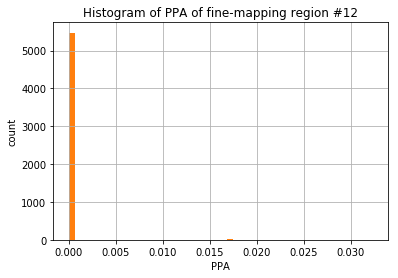

In [35]:
PPAHist(12)

In [81]:
#get the max PPA by each seg
def rankPPA(fgwas, region): 
    print("best fine-mappinig result")
    indices = fgwas.groupby('chunk')['PPA'].idxmax
    print(fgwas.loc[indices])
    print("best GWAS result")
    indices = region.groupby('SEGNUMBER')['pval'].idxmin
    print(region.loc[indices])
    

In [70]:
#merge the GWAS pvalue with the finemapping 
res = pd.merge(region, fgwas, left_on = 'variant', right_on = 'id')
sub = res.loc[(fgwas['chunk']==0), ]
rankPPA(sub)

best fine-mappinig result
      chr_x     pos_x ref alt    index          variant minor_allele  \
2938     12  82556397   T   C  9710012  12:82556397:T:C            C   

      minor_AF  expected_case_minor_AC  low_confidence_variant  ...   chr_y  \
2938  0.418221                 723.523                   False  ...      12   

         pos_y    logBF        Z         V       pi  pseudologPO  pseudoPPA  \
2938  82556397  9.69057  4.96064  0.002617 -8.61939      1.07136   0.744856   

           PPA chunk  
2938  0.032342     0  

[1 rows x 30 columns]
best GWAS result
      chr_x     pos_x ref alt    index          variant minor_allele  \
2938     12  82556397   T   C  9710012  12:82556397:T:C            C   

      minor_AF  expected_case_minor_AC  low_confidence_variant  ...   chr_y  \
2938  0.418221                 723.523                   False  ...      12   

         pos_y    logBF        Z         V       pi  pseudologPO  pseudoPPA  \
2938  82556397  9.69057  4.96064  0.002617

In [71]:
def plotRegion(sub):
    data1 = -np.log10(sub["pval"])
    data2 = sub["PPA"]
    pos = sub["pos_x"]

    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Position')
    ax1.set_ylabel('-log10(pval)', color=color)
    ax1.scatter(pos, data1, color=color,  label='-log10(pvalue)')
    ax1.tick_params(axis='y', labelcolor=color)
    plt.legend(loc=2)
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('PPA', color=color)  # we already handled the x-label with ax1
    ax2.scatter(pos, data2, color=color, label='fine-mapping PPA')
    ax2.tick_params(axis='y', labelcolor=color)
    plt.legend(loc=0)
    ax2.set_ylim(-0.001,0.04)
    ax2.set_xlim(8.24e7,8.27e7)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped

    plt.show()

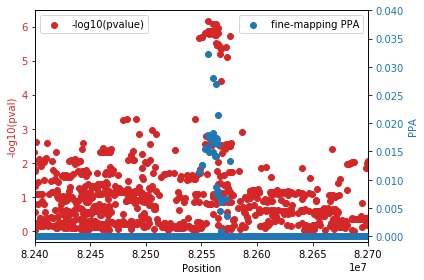

In [72]:
plotRegion(sub)

In [75]:
region.loc[(region['pval']==min(region['pval']))]

,chr,pos,ref,alt,index,variant,minor_allele,minor_AF,expected_case_minor_AC,low_confidence_variant,n_complete_samples,AC,ytx,beta,se,tstat,pval,SEGNUMBER,snp
17759,4,182158091,C,T,4051199,4:182158091:C:T,T,0.018967,32.8128,False,361194,13701.5,63.0039,0.002451,0.000442,5.53961,3.033530e-08,2,4_182158091


In [83]:
rankPPA(fgwas_no, region)

best fine-mappinig result
                      id  chr        pos     logBF        Z         V  \
3083     3:150488202:T:A    3  150488202   8.57247 -4.77635  0.023754   
17759    4:182158091:C:T    4  182158091  11.98960  5.53961  0.034219   
25364     6:11491250:A:G    6   11491250   8.07702  4.71063  0.037780   
41861   7:51185016:AAT:A    7   51185016  10.52620  5.14288  0.009319   
46655     8:36056701:G:A    8   36056701   8.94059  4.92334  0.041508   
59518   9:111786116:CA:C    9  111786116  10.96600  5.25490  0.014711   
67325    10:72684850:T:C   10   72684850   8.77305  4.82780  0.025245   
78719   11:116037160:T:C   11  116037160   9.25028  4.99755  0.042864   
86130  12:82565154:T:TAA   12   82565154   9.86109  4.99660  0.002607   
92468    15:37229967:A:G   15   37229967   8.13051  4.72467  0.038188   
98552    17:42894350:G:A   17   42894350  10.43160  5.21401  0.031753   

            pi  pseudologPO  pseudoPPA       PPA  chunk  
3083  -8.70168    -0.129045   0.467783 